<a href="https://colab.research.google.com/github/tuanldVGU/deeplearning_assignment3/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning _ assignment 3 _ Tuan Lu Dinh _ a1866436

In [1]:
import numpy as np
import pandas as pd
from random import randrange
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler


#1 Import the data and checking


In [2]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Colab Notebooks")


Mounted at /content/drive


In [3]:
# Get data from the library
og_data = pd.read_csv('./tesla.csv')

og_data['Date'] = pd.to_datetime(og_data['Date'])

og_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
og_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1692 non-null   datetime64[ns]
 1   Open       1692 non-null   float64       
 2   High       1692 non-null   float64       
 3   Low        1692 non-null   float64       
 4   Close      1692 non-null   float64       
 5   Volume     1692 non-null   int64         
 6   Adj Close  1692 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 92.7 KB


In [5]:
train, validation = train_test_split(og_data, test_size=0.3, random_state= None, shuffle=False)

print(f"Train shape: {np.shape(train)} and Validation shape: {np.shape(validation)} " )


Train shape: (1184, 7) and Validation shape: (508, 7) 


In [6]:
# Check for NaN under an entire DataFrame
print("Nan values on train set exist:",sum(train.isna().sum()))
print("Nan values on validation set exist:",sum(validation.isna().sum()))
# Check for Null under an entire DataFrame
print("Null values on train set exist:",sum(train.isnull().sum()))
print("Null values on validation set exist:",sum(validation.isnull().sum()))

Nan values on train set exist: 0
Nan values on validation set exist: 0
Null values on train set exist: 0
Null values on validation set exist: 0


#2. Preprocess data

In [7]:
scaler = MinMaxScaler(feature_range = (0,1))

In [8]:
train_open = train.Open.values
train_open = np.reshape(train_open, (-1,1))
# scaling dataset
train_open_scaled = scaler.fit_transform(train_open)
train_open_scaled

array([[0.01053291],
       [0.03553936],
       [0.03262991],
       ...,
       [0.634626  ],
       [0.64453278],
       [0.65410817]])

In [9]:
test_open = validation.Open.values
test_open = np.reshape(test_open, (-1,1))
test_open_scaled =  scaler.fit_transform(test_open)
np.shape(test_open)

(508, 1)

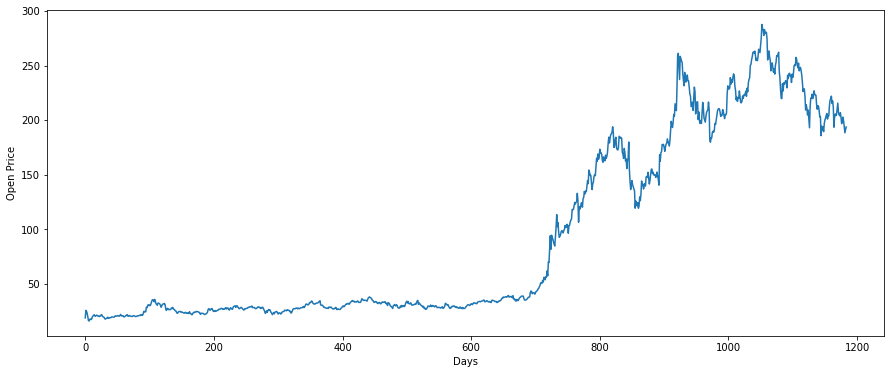

In [10]:
plt.subplots(figsize = (15,6))
plt.plot(train_open)
plt.xlabel("Days")
plt.ylabel("Open Price")
plt.show()

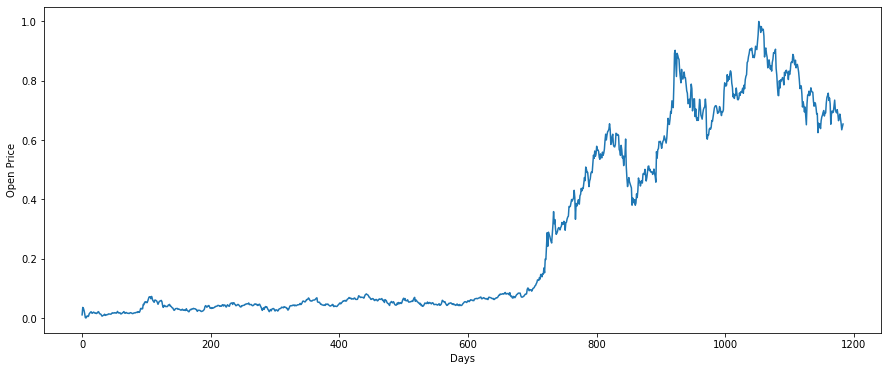

In [11]:
plt.subplots(figsize = (15,6))
plt.plot(train_open_scaled)
plt.xlabel("Days")
plt.ylabel("Open Price")
plt.show()

#3 Model building

In [12]:
def gen_data(time_step, data):
  X_train = []
  y_train = []

  for i in range(time_step, data.shape[0]):
      X_train.append(data[i-time_step:i,0])
      y_train.append(data[i,0])
      
  # convert list to array
  X_train, y_train = np.array(X_train), np.array(y_train)
  # reshape to train
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
  y_train = np.reshape(y_train, (y_train.shape[0],1))
  return X_train, y_train


In [13]:
time_step = 50
X_train, y_train = gen_data(time_step, train_open_scaled)
print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1134, 50, 1)
Shape of y_train after reshape : (1134, 1)


In [14]:
X_test, y_test =  gen_data(time_step, test_open_scaled)

In [30]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
model = Sequential()

model.add(SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1)) )
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True) )
model.add(Dropout(0.2))


model.add(SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

history = model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
36/36 [==============================] - 5s 45ms/step - loss: 0.4037 - accuracy: 0.0000e+00
Epoch 2/50
36/36 [==============================] - 2s 45ms/step - loss: 0.2766 - accuracy: 0.0000e+00
Epoch 3/50
36/36 [==============================] - 2s 46ms/step - loss: 0.2357 - accuracy: 0.0000e+00
Epoch 4/50
36/36 [==============================] - 2s 45ms/step - loss: 0.1631 - accuracy: 8.8183e-04
Epoch 5/50
36/36 [==============================] - 2s 46ms/step - loss: 0.1083 - accuracy: 8.8183e-04
Epoch 6/50
36/36 [==============================] - 2s 45ms/step - loss: 0.0779 - accuracy: 8.8183e-04
Epoch 7/50
36/36 [==============================] - 2s 47ms/step - loss: 0.0624 - accuracy: 8.8183e-04
Epoch 8/50
36/36 [==============================] - 2s 45ms/step - loss: 0.0505 - accuracy: 8.8183e-04
Epoch 9/50
36/36 [==============================] - 2s 46ms/step - loss: 0.0342 - accuracy: 8.8183e-04
Epoch 10/50
36/36 [==============================] - 2s 56ms/step - loss:

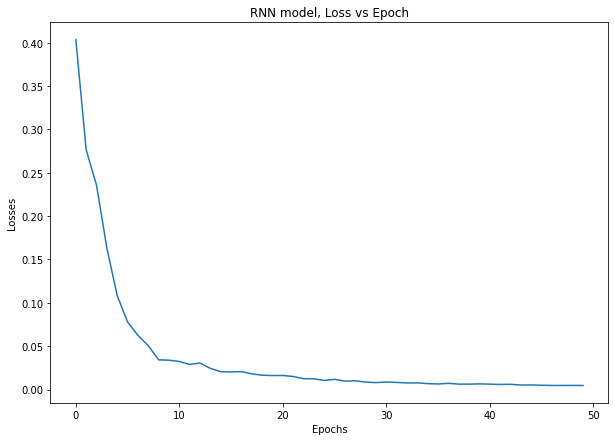

In [31]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("RNN model, Loss vs Epoch")
plt.show()

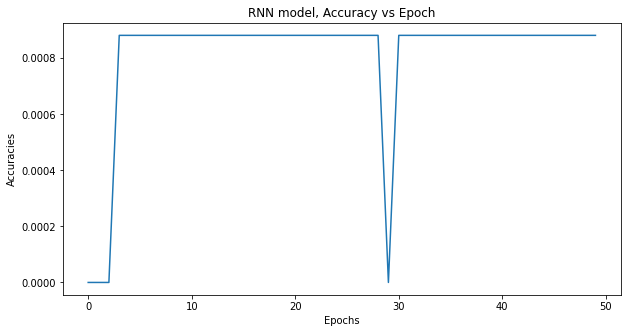

In [32]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("RNN model, Accuracy vs Epoch")
plt.show()

In [33]:
y_pred = model.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_pred.shape

36/36 [==============================] - 1s 13ms/step


(1134, 1)

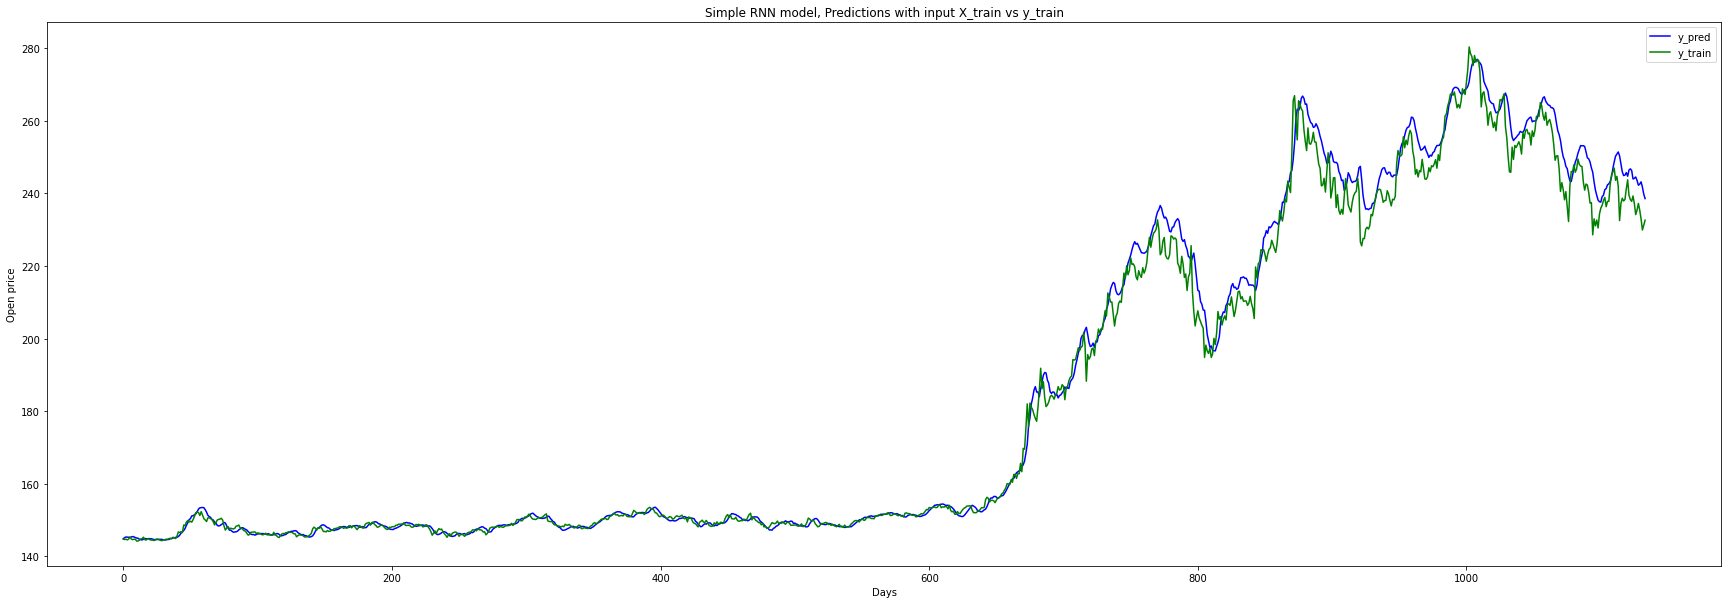

In [34]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [35]:
y_pred_of_test = model.predict(X_test)
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)

print("Shape of y_pred_of_test :",y_pred_of_test.shape)

15/15 [==============================] - 0s 12ms/step
Shape of y_pred_of_test : (458, 1)


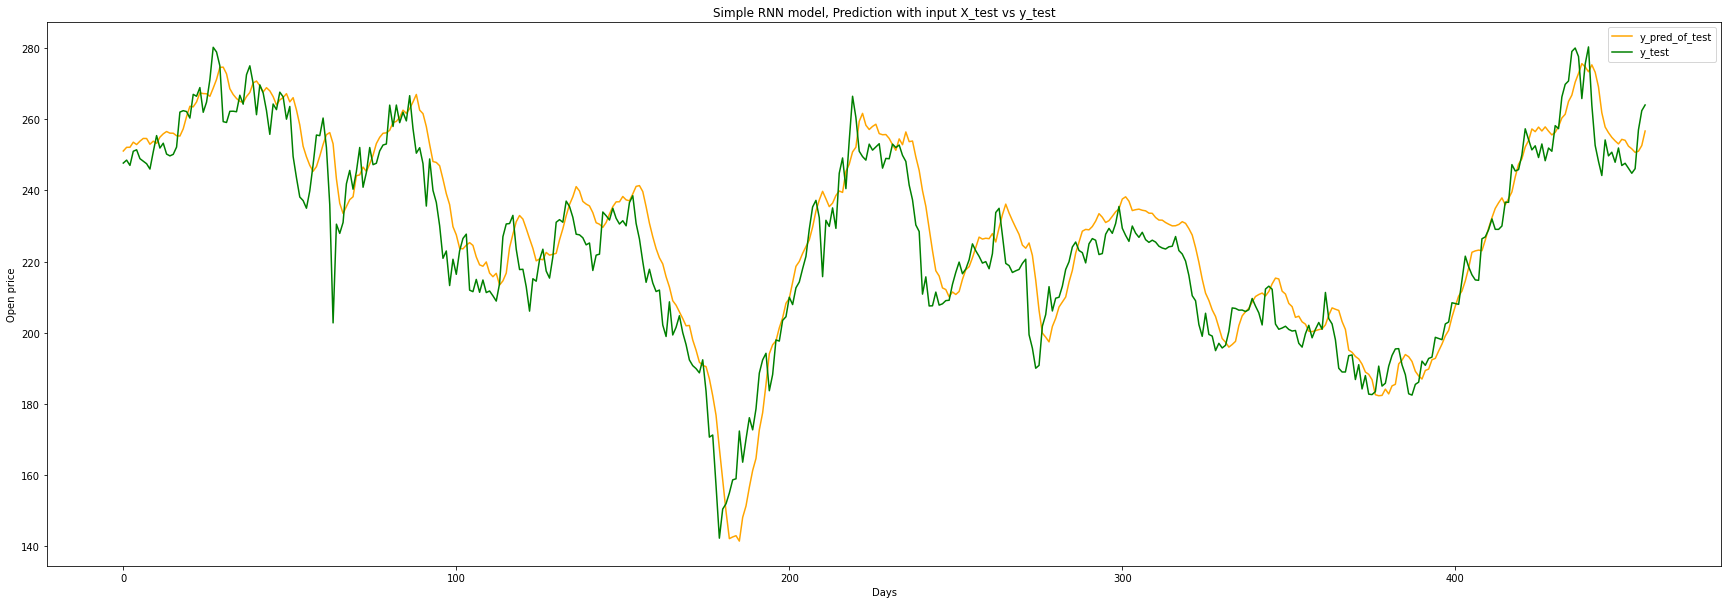

In [36]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

In [37]:
rsme = np.sqrt( np.mean( y_pred - y_train )**2 )
rsme

1.674601124793649

## 4 LSTM model

In [38]:
y_train = scaler.fit_transform(y_train)

In [39]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1)))
model_lstm.add(LSTM(64, return_sequences= False))
model.add(Dropout(0.2))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
114/114 [==============================] - 9s 43ms/step - loss: 0.0080 - accuracy: 0.0018
Epoch 2/10
114/114 [==============================] - 5s 43ms/step - loss: 0.0013 - accuracy: 0.0018
Epoch 3/10
114/114 [==============================] - 5s 43ms/step - loss: 0.0013 - accuracy: 0.0018
Epoch 4/10
114/114 [==============================] - 5s 43ms/step - loss: 9.2923e-04 - accuracy: 0.0018
Epoch 5/10
114/114 [==============================] - 5s 43ms/step - loss: 0.0011 - accuracy: 0.0018
Epoch 6/10
114/114 [==============================] - 5s 43ms/step - loss: 7.1928e-04 - accuracy: 0.0018
Epoch 7/10
114/114 [==============================] - 5s 43ms/step - loss: 8.2236e-04 - accuracy: 0.0018
Epoch 8/10
114/114 [==============================] - 5s 43ms/step - loss: 6.9896e-04 - accuracy: 0.0018
Epoch 9/10
114/114 [==============================] - 5s 43ms/step - loss: 6.1254e-04 - accuracy: 0.0018
Epoch 10/10
114/114 [==============================] - 5s 44ms/step - l

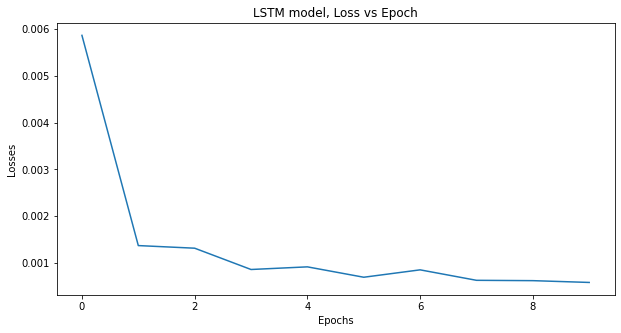

In [ ]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Loss vs Epoch")
plt.show()

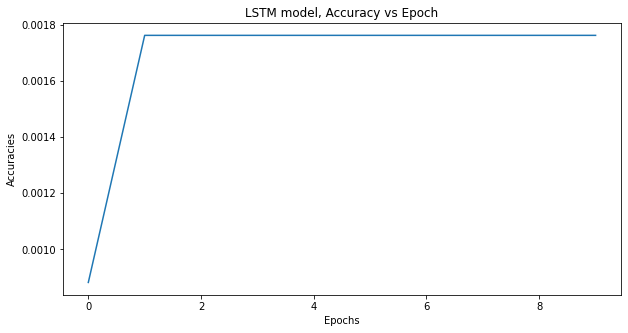

In [ ]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

### 4.2 Evaluating LSTM model

In [ ]:
lstm_pred = model_lstm.predict(X_test)
lstm_pred = scaler.inverse_transform(lstm_pred)
rsme = np.sqrt( np.mean( lstm_pred - scaler.inverse_transform(y_test) )**2 )
rsme

15/15 [==============================] - 0s 11ms/step


0.020519191698389137

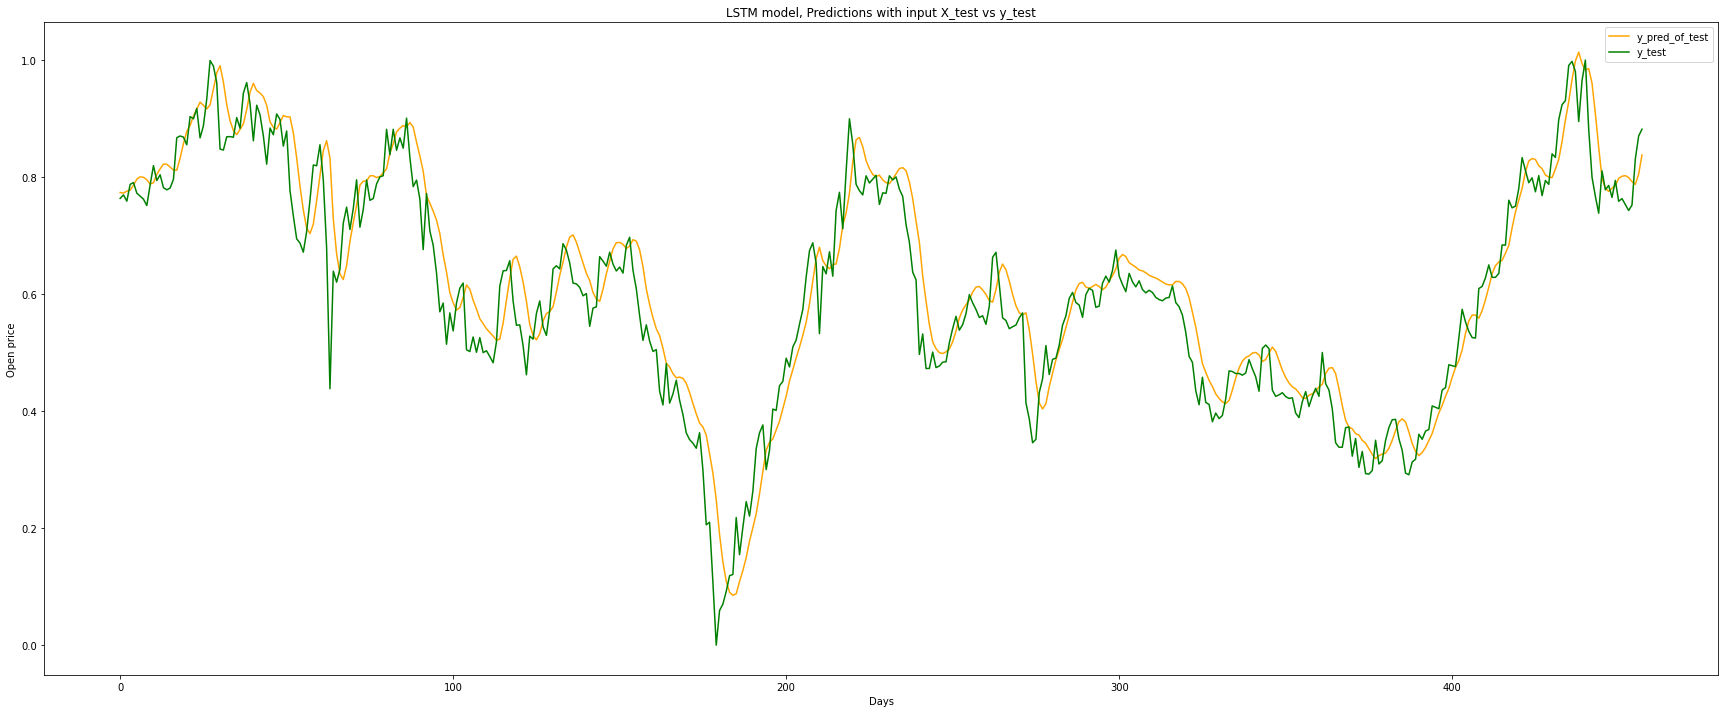

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(lstm_pred, label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()


## 5 GRU models


In [ ]:
from keras.layers import GRU

y_train = scaler.fit_transform(y_train)
model_gru = Sequential()
model_gru.add(GRU(64, return_sequences=True, input_shape = (X_train.shape[1],1)))
model_gru.add(GRU(64, return_sequences= False))
model.add(Dropout(0.2))
model_gru.add(Dense(32))
model_gru.add(Dense(1))
model_gru.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history_gru = model_gru.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
114/114 [==============================] - 6s 29ms/step - loss: 0.0054 - accuracy: 0.0018
Epoch 2/10
114/114 [==============================] - 3s 29ms/step - loss: 5.1920e-04 - accuracy: 0.0018
Epoch 3/10
114/114 [==============================] - 3s 30ms/step - loss: 4.9126e-04 - accuracy: 0.0018
Epoch 4/10
114/114 [==============================] - 3s 29ms/step - loss: 5.1467e-04 - accuracy: 0.0018
Epoch 5/10
114/114 [==============================] - 3s 29ms/step - loss: 3.9542e-04 - accuracy: 0.0018
Epoch 6/10
114/114 [==============================] - 3s 29ms/step - loss: 3.7421e-04 - accuracy: 0.0018
Epoch 7/10
114/114 [==============================] - 3s 29ms/step - loss: 5.0417e-04 - accuracy: 0.0018
Epoch 8/10
114/114 [==============================] - 3s 30ms/step - loss: 4.8032e-04 - accuracy: 0.0018
Epoch 9/10
114/114 [==============================] - 3s 30ms/step - loss: 7.7661e-04 - accuracy: 0.0018
Epoch 10/10
114/114 [==============================] - 3s 2

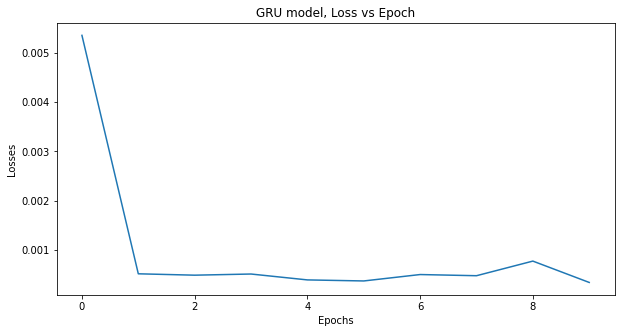

In [ ]:
plt.figure(figsize =(10,5))
plt.plot(history_gru.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("GRU model, Loss vs Epoch")
plt.show()

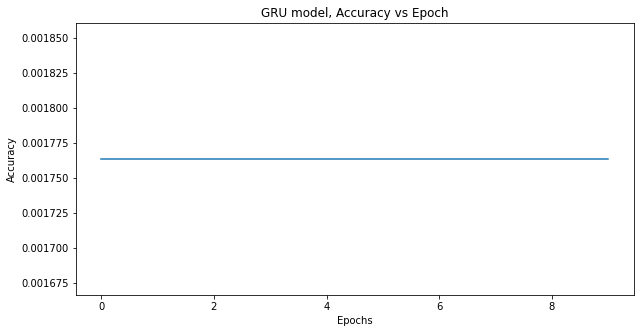

In [ ]:
plt.figure(figsize =(10,5))
plt.plot(history_gru.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("GRU model, Accuracy vs Epoch")
plt.show()

In [ ]:
gru_pred = model_gru.predict(X_test)
gru_pred = scaler.inverse_transform(gru_pred)
rsme = np.sqrt( np.mean( gru_pred - scaler.inverse_transform(y_test) )**2 )
rsme

15/15 [==============================] - 0s 8ms/step


0.015064516643878008

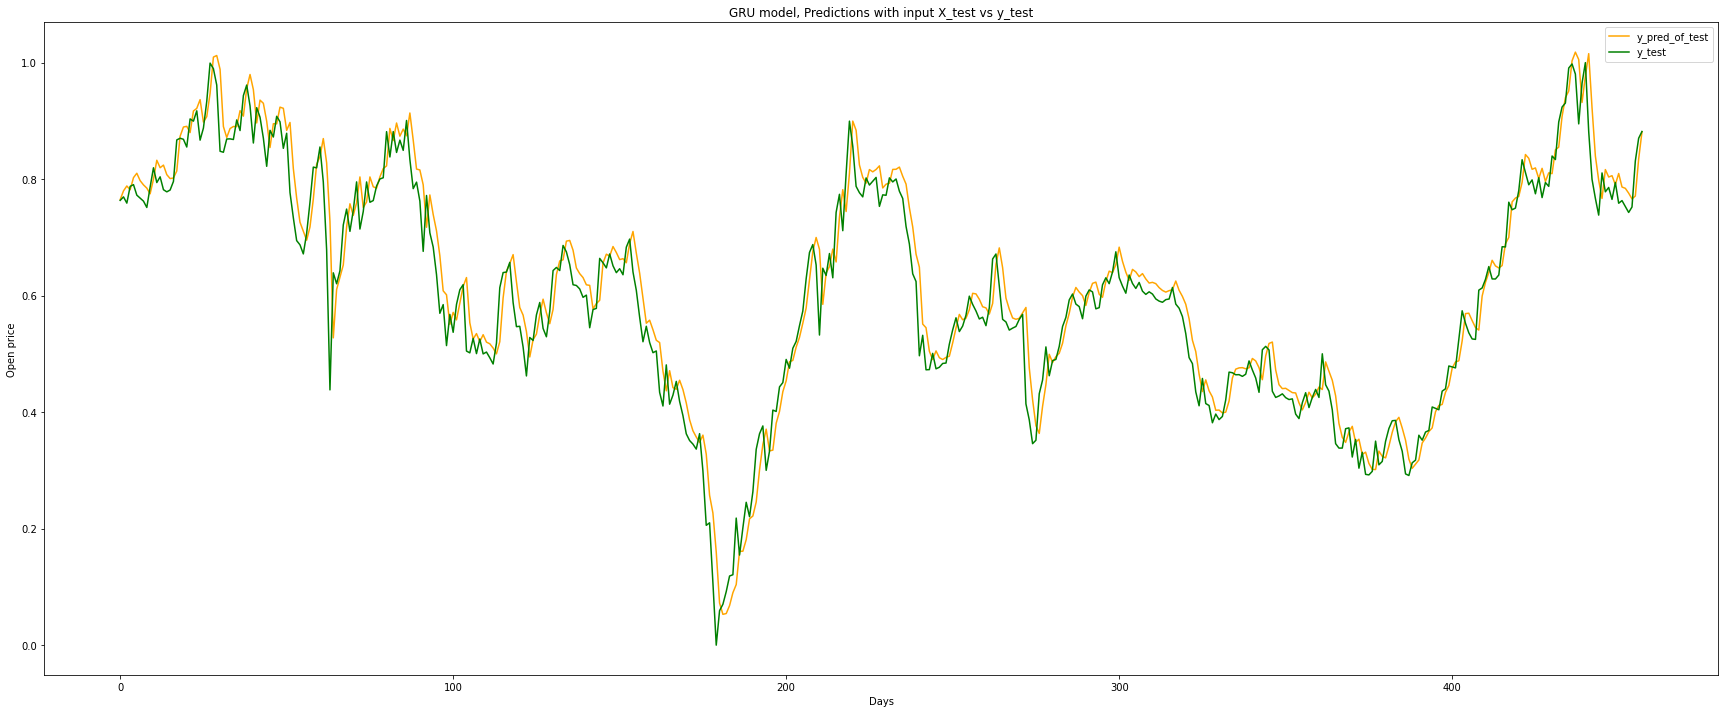

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(gru_pred, label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("GRU model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

## 6. Time step experiment

In [17]:
X20_train, y20_train = gen_data(20, train_open_scaled)
X20_test, y20_test = gen_data(20, train_open_scaled)
X100_train, y100_train = gen_data(100, train_open_scaled)
X100_test, y100_test = gen_data(100, train_open_scaled)

In [21]:
#RNN
model20 = Sequential()

model20.add(SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X20_train.shape[1],1)) )
model20.add(Dropout(0.2))

model20.add(SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True) )
model20.add(Dropout(0.2))


model20.add(SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True))
model20.add(Dropout(0.2))

model20.add(SimpleRNN(units = 50))
model20.add(Dropout(0.2))

model20.add(Dense(units = 1))

model20.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])
historyRNN20 = model20.fit(X20_train, y20_train, epochs = 50, batch_size = 32)

Epoch 1/50
37/37 [==============================] - 5s 25ms/step - loss: 0.2384 - accuracy: 0.0000e+00
Epoch 2/50
37/37 [==============================] - 1s 25ms/step - loss: 0.1344 - accuracy: 8.5911e-04
Epoch 3/50
37/37 [==============================] - 1s 36ms/step - loss: 0.0807 - accuracy: 8.5911e-04
Epoch 4/50
37/37 [==============================] - 2s 43ms/step - loss: 0.0625 - accuracy: 0.0000e+00
Epoch 5/50
37/37 [==============================] - 1s 32ms/step - loss: 0.0477 - accuracy: 8.5911e-04
Epoch 6/50
37/37 [==============================] - 1s 21ms/step - loss: 0.0396 - accuracy: 0.0000e+00
Epoch 7/50
37/37 [==============================] - 1s 31ms/step - loss: 0.0337 - accuracy: 8.5911e-04
Epoch 8/50
37/37 [==============================] - 1s 28ms/step - loss: 0.0284 - accuracy: 8.5911e-04
Epoch 9/50
37/37 [==============================] - 1s 27ms/step - loss: 0.0277 - accuracy: 8.5911e-04
Epoch 10/50
37/37 [==============================] - 2s 42ms/step - loss:

In [22]:
y20_pred = model20.predict(X20_test)
y20_pred = scaler.inverse_transform(y20_pred)
rsme = np.sqrt( np.mean( y20_pred - scaler.inverse_transform(y20_test) )**2 )
rsme

37/37 [==============================] - 2s 10ms/step


3.2947009087130796

In [25]:
#RNN
model100 = Sequential()

model100.add(SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X100_train.shape[1],1)) )
model100.add(Dropout(0.2))

model100.add(SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True) )
model100.add(Dropout(0.2))


model100.add(SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True))
model100.add(Dropout(0.2))

model100.add(SimpleRNN(units = 50))
model100.add(Dropout(0.2))

model100.add(Dense(units = 1))

model100.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])
historyRNN100 = model100.fit(X100_train, y100_train, epochs = 50, batch_size = 32)

Epoch 1/50
34/34 [==============================] - 9s 148ms/step - loss: 0.3301 - accuracy: 9.2251e-04
Epoch 2/50
34/34 [==============================] - 7s 199ms/step - loss: 0.1959 - accuracy: 9.2251e-04
Epoch 3/50
34/34 [==============================] - 4s 119ms/step - loss: 0.1222 - accuracy: 9.2251e-04
Epoch 4/50
34/34 [==============================] - 3s 89ms/step - loss: 0.0931 - accuracy: 9.2251e-04
Epoch 5/50
34/34 [==============================] - 3s 90ms/step - loss: 0.0609 - accuracy: 9.2251e-04
Epoch 6/50
34/34 [==============================] - 3s 90ms/step - loss: 0.0550 - accuracy: 9.2251e-04
Epoch 7/50
34/34 [==============================] - 3s 89ms/step - loss: 0.0472 - accuracy: 9.2251e-04
Epoch 8/50
34/34 [==============================] - 3s 91ms/step - loss: 0.0367 - accuracy: 9.2251e-04
Epoch 9/50
34/34 [==============================] - 3s 90ms/step - loss: 0.0390 - accuracy: 9.2251e-04
Epoch 10/50
34/34 [==============================] - 3s 90ms/step - lo

In [26]:
y100_pred = model100.predict(X100_test)
y100_pred = scaler.inverse_transform(y100_pred)
rsme = np.sqrt( np.mean( y100_pred - scaler.inverse_transform(y100_test) )**2 )
rsme

34/34 [==============================] - 1s 21ms/step


2.5715952240417352

In [41]:
model_lstm_20 = Sequential()
model_lstm_20.add(LSTM(64,return_sequences=True,input_shape = (X20_train.shape[1],1)))
model_lstm_20.add(LSTM(64, return_sequences= False))
model.add(Dropout(0.2))
model_lstm_20.add(Dense(32))
model_lstm_20.add(Dense(1))
model_lstm_20.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history20 = model_lstm_20.fit(X20_train, y20_train, epochs = 10, batch_size = 10)

Epoch 1/10
117/117 [==============================] - 6s 20ms/step - loss: 0.0070 - accuracy: 8.5911e-04
Epoch 2/10
117/117 [==============================] - 3s 23ms/step - loss: 0.0011 - accuracy: 8.5911e-04
Epoch 3/10
117/117 [==============================] - 5s 44ms/step - loss: 0.0011 - accuracy: 8.5911e-04
Epoch 4/10
117/117 [==============================] - 6s 50ms/step - loss: 8.7491e-04 - accuracy: 8.5911e-04
Epoch 5/10
117/117 [==============================] - 3s 22ms/step - loss: 8.8471e-04 - accuracy: 8.5911e-04
Epoch 6/10
117/117 [==============================] - 2s 20ms/step - loss: 9.8308e-04 - accuracy: 8.5911e-04
Epoch 7/10
117/117 [==============================] - 4s 32ms/step - loss: 7.1373e-04 - accuracy: 8.5911e-04
Epoch 8/10
117/117 [==============================] - 3s 24ms/step - loss: 7.9821e-04 - accuracy: 8.5911e-04
Epoch 9/10
117/117 [==============================] - 3s 26ms/step - loss: 5.6462e-04 - accuracy: 8.5911e-04
Epoch 10/10
117/117 [==========

In [42]:
y20_pred = model_lstm_20.predict(X20_test)
y20_pred = scaler.inverse_transform(y20_pred)
rsme = np.sqrt( np.mean( y20_pred - scaler.inverse_transform(y20_test) )**2 )
rsme

37/37 [==============================] - 1s 8ms/step


2.1346716744592973

In [43]:
model_lstm_100 = Sequential()
model_lstm_100.add(LSTM(64,return_sequences=True,input_shape = (X100_train.shape[1],1)))
model_lstm_100.add(LSTM(64, return_sequences= False))
model.add(Dropout(0.2))
model_lstm_100.add(Dense(32))
model_lstm_100.add(Dense(1))
model_lstm_100.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history100 = model_lstm_100.fit(X100_train, y100_train, epochs = 10, batch_size = 10)

Epoch 1/10
109/109 [==============================] - 13s 84ms/step - loss: 0.0078 - accuracy: 9.2251e-04
Epoch 2/10
109/109 [==============================] - 9s 84ms/step - loss: 0.0012 - accuracy: 9.2251e-04
Epoch 3/10
109/109 [==============================] - 9s 84ms/step - loss: 0.0011 - accuracy: 9.2251e-04
Epoch 4/10
109/109 [==============================] - 9s 83ms/step - loss: 0.0012 - accuracy: 9.2251e-04
Epoch 5/10
109/109 [==============================] - 9s 83ms/step - loss: 9.0763e-04 - accuracy: 9.2251e-04
Epoch 6/10
109/109 [==============================] - 10s 88ms/step - loss: 8.4499e-04 - accuracy: 9.2251e-04
Epoch 7/10
109/109 [==============================] - 9s 83ms/step - loss: 8.3461e-04 - accuracy: 9.2251e-04
Epoch 8/10
109/109 [==============================] - 10s 88ms/step - loss: 7.6785e-04 - accuracy: 9.2251e-04
Epoch 9/10
109/109 [==============================] - 9s 83ms/step - loss: 7.5527e-04 - accuracy: 9.2251e-04
Epoch 10/10
109/109 [===========

In [44]:
y100_pred = model_lstm_100.predict(X100_test)
y100_pred = scaler.inverse_transform(y100_pred)
rsme = np.sqrt( np.mean( y100_pred - scaler.inverse_transform(y100_test) )**2 )
rsme

34/34 [==============================] - 2s 28ms/step


0.444327460029681

In [45]:
from keras.layers import GRU

model_gru_20 = Sequential()
model_gru_20.add(GRU(64, return_sequences=True, input_shape = (X20_train.shape[1],1)))
model_gru_20.add(GRU(64, return_sequences= False))
model.add(Dropout(0.2))
model_gru_20.add(Dense(32))
model_gru_20.add(Dense(1))
model_gru_20.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history_gru_20 = model_gru_20.fit(X20_train, y20_train, epochs = 10, batch_size = 10)

Epoch 1/10
117/117 [==============================] - 7s 20ms/step - loss: 0.0035 - accuracy: 8.5911e-04
Epoch 2/10
117/117 [==============================] - 2s 21ms/step - loss: 4.7405e-04 - accuracy: 8.5911e-04
Epoch 3/10
117/117 [==============================] - 2s 21ms/step - loss: 4.8570e-04 - accuracy: 8.5911e-04
Epoch 4/10
117/117 [==============================] - 2s 20ms/step - loss: 5.7669e-04 - accuracy: 8.5911e-04
Epoch 5/10
117/117 [==============================] - 2s 21ms/step - loss: 5.7346e-04 - accuracy: 8.5911e-04
Epoch 6/10
117/117 [==============================] - 3s 26ms/step - loss: 3.5869e-04 - accuracy: 8.5911e-04
Epoch 7/10
117/117 [==============================] - 2s 20ms/step - loss: 3.7662e-04 - accuracy: 8.5911e-04
Epoch 8/10
117/117 [==============================] - 2s 21ms/step - loss: 4.5197e-04 - accuracy: 8.5911e-04
Epoch 9/10
117/117 [==============================] - 2s 20ms/step - loss: 3.4483e-04 - accuracy: 8.5911e-04
Epoch 10/10
117/117 [==

In [49]:
y20_pred = model_gru_20.predict(X20_test)
y20_pred = scaler.inverse_transform(y20_pred)
rsme = np.sqrt( np.mean( y20_pred - scaler.inverse_transform(y20_test) )**2 )
rsme

37/37 [==============================] - 2s 11ms/step


0.5442490080996939

In [48]:
model_gru_100 = Sequential()
model_gru_100.add(GRU(64, return_sequences=True, input_shape = (X100_train.shape[1],1)))
model_gru_100.add(GRU(64, return_sequences= False))
model.add(Dropout(0.2))
model_gru_100.add(Dense(32))
model_gru_100.add(Dense(1))
model_gru_100.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history_gru_100 = model_gru_100.fit(X100_train, y100_train, epochs = 10, batch_size = 10)

Epoch 1/10
109/109 [==============================] - 14s 82ms/step - loss: 0.0075 - accuracy: 9.2251e-04
Epoch 2/10
109/109 [==============================] - 9s 82ms/step - loss: 5.1387e-04 - accuracy: 9.2251e-04
Epoch 3/10
109/109 [==============================] - 9s 82ms/step - loss: 5.0278e-04 - accuracy: 9.2251e-04
Epoch 4/10
109/109 [==============================] - 9s 82ms/step - loss: 4.1195e-04 - accuracy: 9.2251e-04
Epoch 5/10
109/109 [==============================] - 9s 82ms/step - loss: 4.0708e-04 - accuracy: 9.2251e-04
Epoch 6/10
109/109 [==============================] - 9s 82ms/step - loss: 3.7489e-04 - accuracy: 9.2251e-04
Epoch 7/10
109/109 [==============================] - 9s 83ms/step - loss: 4.2357e-04 - accuracy: 9.2251e-04
Epoch 8/10
109/109 [==============================] - 9s 82ms/step - loss: 3.4748e-04 - accuracy: 9.2251e-04
Epoch 9/10
109/109 [==============================] - 9s 87ms/step - loss: 3.6362e-04 - accuracy: 9.2251e-04
Epoch 10/10
109/109 [=

In [50]:
y100_pred = model_gru_100.predict(X100_test)
y100_pred = scaler.inverse_transform(y100_pred)
rsme = np.sqrt( np.mean( y100_pred - scaler.inverse_transform(y100_test) )**2 )
rsme

34/34 [==============================] - 2s 23ms/step


2.9860307650995064